In [ ]:
%pip install tensorflow matplotlib

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
keras = tf.keras
mnist = keras.datasets.mnist
models = keras.models
layers = keras.layers



Loading the dataset and spliting it into train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalizing pixel values (0-255) to the range 0-1
Reshaping images to (28, 28, 1) for compatibility with CNN and dataset

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


Proceeding with creating a model with 2 intermediate layers and one output layer

Code description:
```
layers.Input()       # input shape 
layers.Flatten(),    # Flatten layer to ease of processing
activation='relu'    # recitified linear unit  
activation='softmax' # softmax function for output layer
```

In [ ]:
model = models.Sequential([                    
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),                     
    layers.Dense(128, activation='relu'), 
    layers.Dense(64, activation='relu'),  
    layers.Dense(10, activation='softmax')
])


Compile the model with specified layers
* we are using adam optimizer which is a general optimizer to basic models
* sparse_categorical_crossentropy, as the name says this loss metric is used to deal with sparse matrices
* accuracy, another simple metric to include with model during training process 

In [26]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Training the model

In [12]:
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9840 - loss: 0.0499 - val_accuracy: 0.9744 - val_loss: 0.0883
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9889 - loss: 0.0354 - val_accuracy: 0.9748 - val_loss: 0.0809
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9905 - loss: 0.0292 - val_accuracy: 0.9791 - val_loss: 0.0773


In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.9801 - loss: 0.1992
Test accuracy: 0.982200026512146


Saving the model to persist

In [14]:
model.save('my_model.keras')


Example: Predicting the image in the test set

change the `num` variable to change test image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Model Prediction is :  9


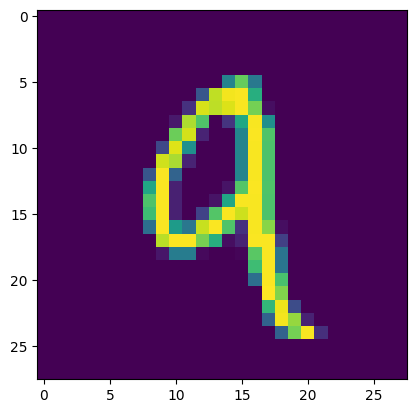

In [30]:
import numpy as np 
num = 125
plt.imshow(x_test[num])
image_to_predict = x_test[num]
image_to_predict = np.expand_dims(image_to_predict, axis=0)
print("Model Prediction is : ", np.argmax(model.predict(image_to_predict)))